In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from core.neural_network import NeuralNetwork
from core.loss_functions import (
    CategoricalCrossEntropy,
    BinaryCrossEntropy,
    MeanSquaredError,
)
from core.weight_initializers import (
    ZeroInitializer,
    UniformInitializer,
    NormalInitializer,
    XavierInitializer,
    HeInitializer,
)
from core.activations import (
    Linear,
    Sigmoid,
    ReLU,
    Tanh,
    Softmax,
    Swish,
    GELU,
)


In [ ]:
# Load dataset
print("Loading MNIST dataset...")
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist.data, mnist.target

y = y.astype(np.int8)
X = X.to_numpy()
y = y.to_numpy()

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0

def to_categorical(y, num_classes=10):
    return np.eye(num_classes)[y]

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

X_train, X_val, y_train_cat, y_val_cat = train_test_split(
    X_train, y_train_cat, test_size=0.2, random_state=42
)

Loading MNIST dataset...


In [ ]:
# Test base model
model = NeuralNetwork(
    layer_sizes=[784, 128, 64, 10],
    activation_names=[None, "swish", "gelu", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)

history = model.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=10,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)

pred = model.forward(X_test)
pred_classes = np.argmax(pred, axis=1)
accuracy = np.mean(pred_classes == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/10: 100%|██████████| 700/700 [00:02<00:00, 330.36it/s]


Epoch 1/10, Train Loss: 2.0403, Val Loss: 1.3934, Val Acc: 0.6438


Epoch 2/10: 100%|██████████| 700/700 [00:01<00:00, 409.08it/s]


Epoch 2/10, Train Loss: 1.1167, Val Loss: 0.9067, Val Acc: 0.7844


Epoch 3/10: 100%|██████████| 700/700 [00:01<00:00, 501.54it/s]


Epoch 3/10, Train Loss: 0.7824, Val Loss: 0.6900, Val Acc: 0.8237


Epoch 4/10: 100%|██████████| 700/700 [00:01<00:00, 515.93it/s]


Epoch 4/10, Train Loss: 0.6248, Val Loss: 0.5803, Val Acc: 0.8435


Epoch 5/10: 100%|██████████| 700/700 [00:01<00:00, 513.64it/s]


Epoch 5/10, Train Loss: 0.5388, Val Loss: 0.5135, Val Acc: 0.8588


Epoch 6/10: 100%|██████████| 700/700 [00:01<00:00, 502.20it/s]


Epoch 6/10, Train Loss: 0.4855, Val Loss: 0.4707, Val Acc: 0.8692


Epoch 7/10: 100%|██████████| 700/700 [00:01<00:00, 469.40it/s]


Epoch 7/10, Train Loss: 0.4489, Val Loss: 0.4416, Val Acc: 0.8760


Epoch 8/10: 100%|██████████| 700/700 [00:01<00:00, 538.08it/s]


Epoch 8/10, Train Loss: 0.4224, Val Loss: 0.4188, Val Acc: 0.8821


Epoch 9/10: 100%|██████████| 700/700 [00:01<00:00, 508.21it/s]


Epoch 9/10, Train Loss: 0.4019, Val Loss: 0.4006, Val Acc: 0.8877


Epoch 10/10: 100%|██████████| 700/700 [00:01<00:00, 516.87it/s]


Epoch 10/10, Train Loss: 0.3854, Val Loss: 0.3878, Val Acc: 0.8896
Test Accuracy: 0.8926


## HyperParameter Experiment

### Pengaruh Depth dan Width

#### Variasi pada Depth

Training model depth configurations 1


Epoch 1/10: 100%|██████████| 700/700 [00:02<00:00, 297.52it/s]


Epoch 1/10, Train Loss: 1.9067, Val Loss: 1.3489, Val Acc: 0.6669


Epoch 2/10: 100%|██████████| 700/700 [00:01<00:00, 354.25it/s]


Epoch 2/10, Train Loss: 1.0608, Val Loss: 0.8609, Val Acc: 0.7833


Epoch 3/10: 100%|██████████| 700/700 [00:01<00:00, 445.83it/s]


Epoch 3/10, Train Loss: 0.7323, Val Loss: 0.6558, Val Acc: 0.8227


Epoch 4/10: 100%|██████████| 700/700 [00:01<00:00, 444.20it/s]


Epoch 4/10, Train Loss: 0.5880, Val Loss: 0.5552, Val Acc: 0.8456


Epoch 5/10: 100%|██████████| 700/700 [00:01<00:00, 429.20it/s]


Epoch 5/10, Train Loss: 0.5111, Val Loss: 0.4968, Val Acc: 0.8617


Epoch 6/10: 100%|██████████| 700/700 [00:01<00:00, 405.12it/s]


Epoch 6/10, Train Loss: 0.4633, Val Loss: 0.4586, Val Acc: 0.8693


Epoch 7/10: 100%|██████████| 700/700 [00:01<00:00, 445.59it/s]


Epoch 7/10, Train Loss: 0.4303, Val Loss: 0.4303, Val Acc: 0.8746


Epoch 8/10: 100%|██████████| 700/700 [00:01<00:00, 450.55it/s]


Epoch 8/10, Train Loss: 0.4059, Val Loss: 0.4103, Val Acc: 0.8808


Epoch 9/10: 100%|██████████| 700/700 [00:01<00:00, 458.58it/s]


Epoch 9/10, Train Loss: 0.3872, Val Loss: 0.3950, Val Acc: 0.8841


Epoch 10/10: 100%|██████████| 700/700 [00:01<00:00, 448.22it/s]


Epoch 10/10, Train Loss: 0.3722, Val Loss: 0.3811, Val Acc: 0.8878
Test Accuracy (Depth): 0.8944

Training model depth configurations 2


Epoch 1/10: 100%|██████████| 700/700 [00:04<00:00, 148.38it/s]


Epoch 1/10, Train Loss: 1.7905, Val Loss: 1.1582, Val Acc: 0.7013


Epoch 2/10: 100%|██████████| 700/700 [00:04<00:00, 148.07it/s]


Epoch 2/10, Train Loss: 0.8618, Val Loss: 0.6679, Val Acc: 0.8191


Epoch 3/10: 100%|██████████| 700/700 [00:04<00:00, 148.63it/s]


Epoch 3/10, Train Loss: 0.5771, Val Loss: 0.5184, Val Acc: 0.8518


Epoch 4/10: 100%|██████████| 700/700 [00:04<00:00, 152.97it/s]


Epoch 4/10, Train Loss: 0.4740, Val Loss: 0.4523, Val Acc: 0.8677


Epoch 5/10: 100%|██████████| 700/700 [00:04<00:00, 148.06it/s]


Epoch 5/10, Train Loss: 0.4232, Val Loss: 0.4138, Val Acc: 0.8790


Epoch 6/10: 100%|██████████| 700/700 [00:04<00:00, 156.57it/s]


Epoch 6/10, Train Loss: 0.3913, Val Loss: 0.3899, Val Acc: 0.8864


Epoch 7/10: 100%|██████████| 700/700 [00:04<00:00, 155.13it/s]


Epoch 7/10, Train Loss: 0.3690, Val Loss: 0.3695, Val Acc: 0.8899


Epoch 8/10: 100%|██████████| 700/700 [00:04<00:00, 153.71it/s]


Epoch 8/10, Train Loss: 0.3515, Val Loss: 0.3596, Val Acc: 0.8936


Epoch 9/10: 100%|██████████| 700/700 [00:04<00:00, 140.71it/s]


Epoch 9/10, Train Loss: 0.3380, Val Loss: 0.3489, Val Acc: 0.8962


Epoch 10/10: 100%|██████████| 700/700 [00:05<00:00, 139.43it/s]


Epoch 10/10, Train Loss: 0.3266, Val Loss: 0.3350, Val Acc: 0.9003
Test Accuracy (Depth 2): 0.9059

Training model depth configurations 3


Epoch 1/10: 100%|██████████| 700/700 [00:09<00:00, 73.22it/s]


Epoch 1/10, Train Loss: 1.4409, Val Loss: 0.8098, Val Acc: 0.7788


Epoch 2/10: 100%|██████████| 700/700 [00:09<00:00, 73.23it/s]


Epoch 2/10, Train Loss: 0.6224, Val Loss: 0.5213, Val Acc: 0.8581


Epoch 3/10: 100%|██████████| 700/700 [00:10<00:00, 64.93it/s]


Epoch 3/10, Train Loss: 0.4637, Val Loss: 0.4470, Val Acc: 0.8696


Epoch 4/10: 100%|██████████| 700/700 [00:13<00:00, 53.81it/s]


Epoch 4/10, Train Loss: 0.4047, Val Loss: 0.3949, Val Acc: 0.8834


Epoch 5/10: 100%|██████████| 700/700 [00:12<00:00, 55.78it/s]


Epoch 5/10, Train Loss: 0.3707, Val Loss: 0.3726, Val Acc: 0.8879


Epoch 6/10: 100%|██████████| 700/700 [00:09<00:00, 73.11it/s]


Epoch 6/10, Train Loss: 0.3476, Val Loss: 0.3531, Val Acc: 0.8934


Epoch 7/10: 100%|██████████| 700/700 [00:13<00:00, 53.11it/s]


Epoch 7/10, Train Loss: 0.3302, Val Loss: 0.3308, Val Acc: 0.9029


Epoch 8/10: 100%|██████████| 700/700 [00:11<00:00, 60.35it/s]


Epoch 8/10, Train Loss: 0.3149, Val Loss: 0.3214, Val Acc: 0.9031


Epoch 9/10: 100%|██████████| 700/700 [00:09<00:00, 73.21it/s]


Epoch 9/10, Train Loss: 0.3023, Val Loss: 0.3084, Val Acc: 0.9076


Epoch 10/10: 100%|██████████| 700/700 [00:09<00:00, 74.90it/s]


Epoch 10/10, Train Loss: 0.2911, Val Loss: 0.3005, Val Acc: 0.9101
Test Accuracy (Depth 3): 0.9131


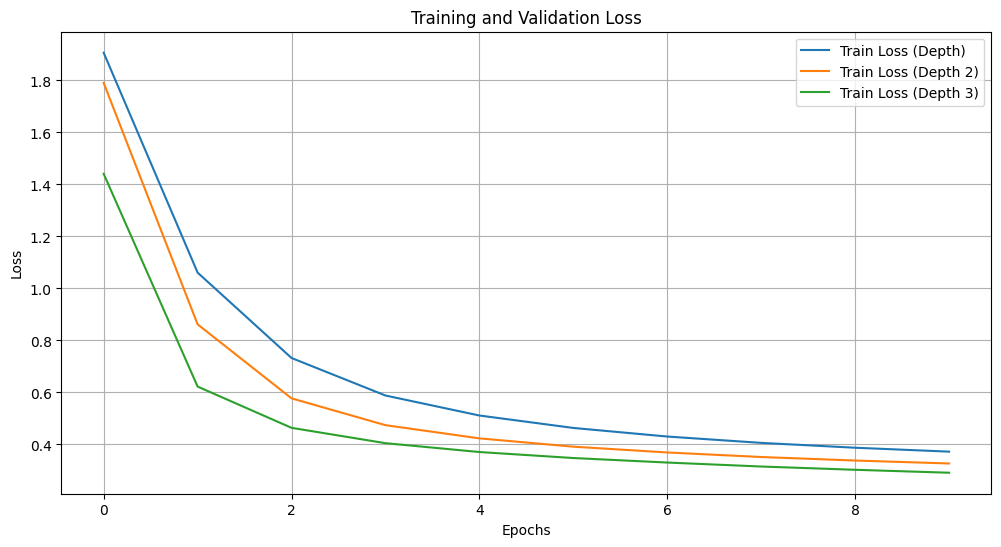

In [ ]:
print("Training model depth configurations 1")
model_depth = NeuralNetwork(
    layer_sizes=[784, 128, 64, 32, 10],
    activation_names=[None, "swish", "gelu", "swish", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)

history_depth = model_depth.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=10,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)

pred_depth = model_depth.forward(X_test)
pred_classes_depth = np.argmax(pred_depth, axis=1)
accuracy_depth = np.mean(pred_classes_depth == y_test)
print(f"Test Accuracy (Depth): {accuracy_depth:.4f}\n")

print("Training model depth configurations 2")
model_depth_2 = NeuralNetwork(
    layer_sizes=[784, 256, 128, 64, 32, 10],
    activation_names=[None, "swish", "gelu", "swish", "gelu", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)

history_depth_2 = model_depth_2.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=10,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)

pred_depth_2 = model_depth_2.forward(X_test)
pred_classes_depth_2 = np.argmax(pred_depth_2, axis=1)
accuracy_depth_2 = np.mean(pred_classes_depth_2 == y_test)
print(f"Test Accuracy (Depth 2): {accuracy_depth_2:.4f}\n")

print("Training model depth configurations 3")
model_depth_3 = NeuralNetwork(
    layer_sizes=[784, 512, 256, 128, 64, 32, 10],
    activation_names=[None, "swish", "gelu", "swish", "gelu", "swish", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)

history_depth_3 = model_depth_3.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=10,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)

pred_depth_3 = model_depth_3.forward(X_test)
pred_classes_depth_3 = np.argmax(pred_depth_3, axis=1)
accuracy_depth_3 = np.mean(pred_classes_depth_3 == y_test)
print(f"Test Accuracy (Depth 3): {accuracy_depth_3:.4f}")

# grafik perbandingan loss
plt.figure(figsize=(12, 6))
plt.plot(
    history_depth["train_loss"], label="Train Loss (Depth)"
)
plt.plot(
    history_depth_2["train_loss"], label="Train Loss (Depth 2)"
)
plt.plot(
    history_depth_3["train_loss"], label="Train Loss (Depth 3)"
)
plt.title("Perbandingan Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

#### Variasi pada Width

Training model width configurations 1


Epoch 1/10: 100%|██████████| 700/700 [00:05<00:00, 123.12it/s]


Epoch 1/10, Train Loss: 1.6741, Val Loss: 1.1882, Val Acc: 0.7214


Epoch 2/10: 100%|██████████| 700/700 [00:04<00:00, 146.89it/s]


Epoch 2/10, Train Loss: 0.9520, Val Loss: 0.7853, Val Acc: 0.8071


Epoch 3/10: 100%|██████████| 700/700 [00:04<00:00, 146.07it/s]


Epoch 3/10, Train Loss: 0.6883, Val Loss: 0.6221, Val Acc: 0.8391


Epoch 4/10: 100%|██████████| 700/700 [00:04<00:00, 147.73it/s]


Epoch 4/10, Train Loss: 0.5687, Val Loss: 0.5401, Val Acc: 0.8533


Epoch 5/10: 100%|██████████| 700/700 [00:04<00:00, 149.56it/s]


Epoch 5/10, Train Loss: 0.5017, Val Loss: 0.4880, Val Acc: 0.8649


Epoch 6/10: 100%|██████████| 700/700 [00:05<00:00, 135.90it/s]


Epoch 6/10, Train Loss: 0.4593, Val Loss: 0.4532, Val Acc: 0.8712


Epoch 7/10: 100%|██████████| 700/700 [00:04<00:00, 144.57it/s]


Epoch 7/10, Train Loss: 0.4299, Val Loss: 0.4294, Val Acc: 0.8766


Epoch 8/10: 100%|██████████| 700/700 [00:04<00:00, 147.23it/s]


Epoch 8/10, Train Loss: 0.4080, Val Loss: 0.4115, Val Acc: 0.8806


Epoch 9/10: 100%|██████████| 700/700 [00:05<00:00, 128.12it/s]


Epoch 9/10, Train Loss: 0.3914, Val Loss: 0.3959, Val Acc: 0.8846


Epoch 10/10: 100%|██████████| 700/700 [00:04<00:00, 142.85it/s]


Epoch 10/10, Train Loss: 0.3779, Val Loss: 0.3834, Val Acc: 0.8884
Test Accuracy (Width): 0.8916

Training model width configurations 2


Epoch 1/10: 100%|██████████| 700/700 [00:13<00:00, 53.08it/s]


Epoch 1/10, Train Loss: 1.4462, Val Loss: 0.9365, Val Acc: 0.8011


Epoch 2/10: 100%|██████████| 700/700 [00:10<00:00, 64.86it/s]


Epoch 2/10, Train Loss: 0.7573, Val Loss: 0.6460, Val Acc: 0.8400


Epoch 3/10: 100%|██████████| 700/700 [00:11<00:00, 62.35it/s]


Epoch 3/10, Train Loss: 0.5762, Val Loss: 0.5362, Val Acc: 0.8588


Epoch 4/10: 100%|██████████| 700/700 [00:11<00:00, 58.74it/s]


Epoch 4/10, Train Loss: 0.4964, Val Loss: 0.4779, Val Acc: 0.8687


Epoch 5/10: 100%|██████████| 700/700 [00:12<00:00, 54.62it/s]


Epoch 5/10, Train Loss: 0.4504, Val Loss: 0.4447, Val Acc: 0.8767


Epoch 6/10: 100%|██████████| 700/700 [00:10<00:00, 65.85it/s]


Epoch 6/10, Train Loss: 0.4206, Val Loss: 0.4207, Val Acc: 0.8779


Epoch 7/10: 100%|██████████| 700/700 [00:10<00:00, 65.16it/s]


Epoch 7/10, Train Loss: 0.3989, Val Loss: 0.4010, Val Acc: 0.8835


Epoch 8/10: 100%|██████████| 700/700 [00:10<00:00, 65.29it/s]


Epoch 8/10, Train Loss: 0.3828, Val Loss: 0.3863, Val Acc: 0.8882


Epoch 9/10: 100%|██████████| 700/700 [00:10<00:00, 65.64it/s]


Epoch 9/10, Train Loss: 0.3695, Val Loss: 0.3762, Val Acc: 0.8912


Epoch 10/10: 100%|██████████| 700/700 [00:10<00:00, 66.29it/s]


Epoch 10/10, Train Loss: 0.3588, Val Loss: 0.3677, Val Acc: 0.8925
Test Accuracy (Width 2): 0.9001

Training model width configurations 3


Epoch 1/10: 100%|██████████| 700/700 [00:34<00:00, 20.15it/s]


Epoch 1/10, Train Loss: 1.3705, Val Loss: 0.8493, Val Acc: 0.7984


Epoch 2/10: 100%|██████████| 700/700 [00:34<00:00, 20.48it/s]


Epoch 2/10, Train Loss: 0.6907, Val Loss: 0.6019, Val Acc: 0.8413


Epoch 3/10: 100%|██████████| 700/700 [00:34<00:00, 20.55it/s]


Epoch 3/10, Train Loss: 0.5379, Val Loss: 0.5096, Val Acc: 0.8600


Epoch 4/10: 100%|██████████| 700/700 [00:32<00:00, 21.69it/s]


Epoch 4/10, Train Loss: 0.4688, Val Loss: 0.4575, Val Acc: 0.8747


Epoch 5/10: 100%|██████████| 700/700 [00:34<00:00, 20.58it/s]


Epoch 5/10, Train Loss: 0.4289, Val Loss: 0.4234, Val Acc: 0.8788


Epoch 6/10: 100%|██████████| 700/700 [00:30<00:00, 22.75it/s]


Epoch 6/10, Train Loss: 0.4018, Val Loss: 0.4075, Val Acc: 0.8830


Epoch 7/10: 100%|██████████| 700/700 [00:34<00:00, 20.56it/s]


Epoch 7/10, Train Loss: 0.3832, Val Loss: 0.3854, Val Acc: 0.8885


Epoch 8/10: 100%|██████████| 700/700 [00:27<00:00, 25.32it/s]


Epoch 8/10, Train Loss: 0.3686, Val Loss: 0.3789, Val Acc: 0.8892


Epoch 9/10: 100%|██████████| 700/700 [00:25<00:00, 27.41it/s]


Epoch 9/10, Train Loss: 0.3569, Val Loss: 0.3650, Val Acc: 0.8932


Epoch 10/10: 100%|██████████| 700/700 [00:25<00:00, 27.55it/s]


Epoch 10/10, Train Loss: 0.3476, Val Loss: 0.3576, Val Acc: 0.8932
Test Accuracy (Width 3): 0.8994


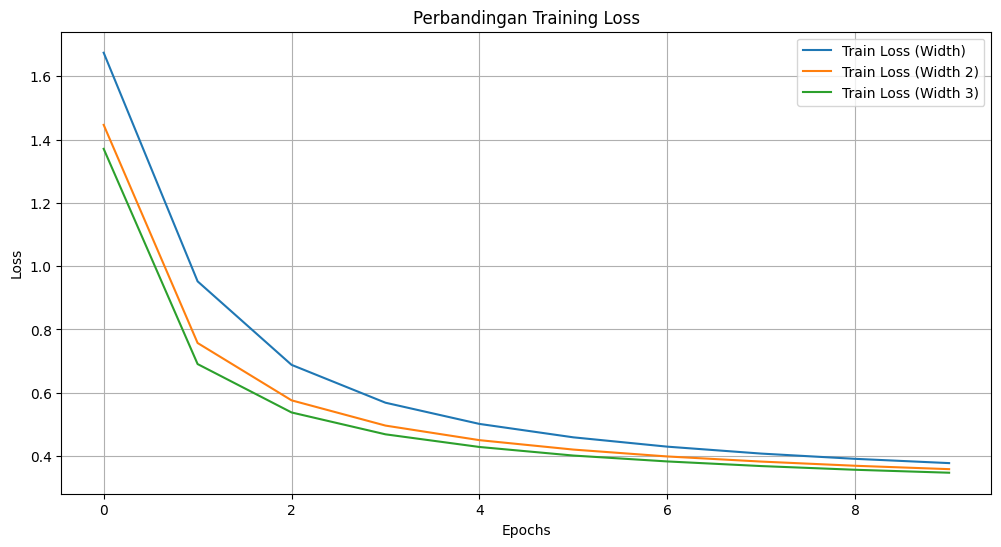

In [ ]:
print("Training model width configurations 1")
model_width = NeuralNetwork(
    layer_sizes=[784, 256, 256, 10],
    activation_names=[None, "swish", "gelu", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)

history_width = model_width.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=10,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)

pred_width = model_width.forward(X_test)
pred_classes_width = np.argmax(pred_width, axis=1)
accuracy_width = np.mean(pred_classes_width == y_test)
print(f"Test Accuracy (Width): {accuracy_width:.4f}\n")

print("Training model width configurations 2")
model_width_2 = NeuralNetwork(
    layer_sizes=[784, 512, 512, 10],
    activation_names=[None, "swish", "gelu", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)

history_width_2 = model_width_2.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=10,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)

pred_width_2 = model_width_2.forward(X_test)
pred_classes_width_2 = np.argmax(pred_width_2, axis=1)
accuracy_width_2 = np.mean(pred_classes_width_2 == y_test)
print(f"Test Accuracy (Width 2): {accuracy_width_2:.4f}\n")

print("Training model width configurations 3")
model_width_3 = NeuralNetwork(
    layer_sizes=[784, 1024, 1024, 10],
    activation_names=[None, "swish", "gelu", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)

history_width_3 = model_width_3.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=10,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)

pred_width_3 = model_width_3.forward(X_test)
pred_classes_width_3 = np.argmax(pred_width_3, axis=1)
accuracy_width_3 = np.mean(pred_classes_width_3 == y_test)
print(f"Test Accuracy (Width 3): {accuracy_width_3:.4f}")

# grafik perbandingan loss
plt.figure(figsize=(12, 6))
plt.plot(
    history_width["train_loss"], label="Train Loss (Width)"
)
plt.plot(
    history_width_2["train_loss"], label="Train Loss (Width 2)"
)
plt.plot(
    history_width_3["train_loss"], label="Train Loss (Width 3)"
)
plt.title("Perbandingan Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

### Pengaruh Fungsi Aktivasi Hidden Layer

Training model activation linear


Epoch 1/10: 100%|██████████| 700/700 [00:01<00:00, 428.65it/s]


Epoch 1/10, Train Loss: 1.6282, Val Loss: 1.0849, Val Acc: 0.7438


Epoch 2/10: 100%|██████████| 700/700 [00:01<00:00, 457.55it/s]


Epoch 2/10, Train Loss: 0.8736, Val Loss: 0.7426, Val Acc: 0.8110


Epoch 3/10: 100%|██████████| 700/700 [00:01<00:00, 558.70it/s]


Epoch 3/10, Train Loss: 0.6565, Val Loss: 0.6084, Val Acc: 0.8371


Epoch 4/10: 100%|██████████| 700/700 [00:01<00:00, 626.70it/s]


Epoch 4/10, Train Loss: 0.5568, Val Loss: 0.5347, Val Acc: 0.8514


Epoch 5/10: 100%|██████████| 700/700 [00:01<00:00, 631.14it/s]


Epoch 5/10, Train Loss: 0.4980, Val Loss: 0.4888, Val Acc: 0.8621


Epoch 6/10: 100%|██████████| 700/700 [00:01<00:00, 691.41it/s]


Epoch 6/10, Train Loss: 0.4596, Val Loss: 0.4586, Val Acc: 0.8688


Epoch 7/10: 100%|██████████| 700/700 [00:01<00:00, 664.10it/s]


Epoch 7/10, Train Loss: 0.4324, Val Loss: 0.4358, Val Acc: 0.8741


Epoch 8/10: 100%|██████████| 700/700 [00:01<00:00, 695.84it/s]


Epoch 8/10, Train Loss: 0.4124, Val Loss: 0.4176, Val Acc: 0.8800


Epoch 9/10: 100%|██████████| 700/700 [00:01<00:00, 641.24it/s]


Epoch 9/10, Train Loss: 0.3963, Val Loss: 0.4032, Val Acc: 0.8838


Epoch 10/10: 100%|██████████| 700/700 [00:00<00:00, 710.35it/s]


Epoch 10/10, Train Loss: 0.3832, Val Loss: 0.3921, Val Acc: 0.8858
Test Accuracy (Activation Linear): 0.8917

Training model activation relu


Epoch 1/10: 100%|██████████| 700/700 [00:01<00:00, 639.64it/s]


Epoch 1/10, Train Loss: 2.0103, Val Loss: 1.4784, Val Acc: 0.6462


Epoch 2/10: 100%|██████████| 700/700 [00:01<00:00, 624.63it/s]


Epoch 2/10, Train Loss: 1.1994, Val Loss: 0.9879, Val Acc: 0.7630


Epoch 3/10: 100%|██████████| 700/700 [00:01<00:00, 641.97it/s]


Epoch 3/10, Train Loss: 0.8562, Val Loss: 0.7627, Val Acc: 0.8079


Epoch 4/10: 100%|██████████| 700/700 [00:00<00:00, 713.62it/s]


Epoch 4/10, Train Loss: 0.6886, Val Loss: 0.6418, Val Acc: 0.8321


Epoch 5/10: 100%|██████████| 700/700 [00:01<00:00, 644.77it/s]


Epoch 5/10, Train Loss: 0.5922, Val Loss: 0.5651, Val Acc: 0.8466


Epoch 6/10: 100%|██████████| 700/700 [00:00<00:00, 715.67it/s]


Epoch 6/10, Train Loss: 0.5301, Val Loss: 0.5154, Val Acc: 0.8584


Epoch 7/10: 100%|██████████| 700/700 [00:01<00:00, 655.23it/s]


Epoch 7/10, Train Loss: 0.4873, Val Loss: 0.4788, Val Acc: 0.8662


Epoch 8/10: 100%|██████████| 700/700 [00:01<00:00, 699.27it/s]


Epoch 8/10, Train Loss: 0.4561, Val Loss: 0.4524, Val Acc: 0.8720


Epoch 9/10: 100%|██████████| 700/700 [00:01<00:00, 676.98it/s]


Epoch 9/10, Train Loss: 0.4325, Val Loss: 0.4320, Val Acc: 0.8767


Epoch 10/10: 100%|██████████| 700/700 [00:00<00:00, 721.37it/s]


Epoch 10/10, Train Loss: 0.4136, Val Loss: 0.4157, Val Acc: 0.8796
Test Accuracy (Activation ReLU): 0.8833

Training model activation sigmoid


Epoch 1/10: 100%|██████████| 700/700 [00:01<00:00, 636.77it/s]


Epoch 1/10, Train Loss: 2.3509, Val Loss: 2.2015, Val Acc: 0.3526


Epoch 2/10: 100%|██████████| 700/700 [00:01<00:00, 666.80it/s]


Epoch 2/10, Train Loss: 2.1608, Val Loss: 2.1157, Val Acc: 0.4725


Epoch 3/10: 100%|██████████| 700/700 [00:01<00:00, 650.73it/s]


Epoch 3/10, Train Loss: 2.0678, Val Loss: 2.0146, Val Acc: 0.5871


Epoch 4/10: 100%|██████████| 700/700 [00:01<00:00, 613.09it/s]


Epoch 4/10, Train Loss: 1.9587, Val Loss: 1.8952, Val Acc: 0.6338


Epoch 5/10: 100%|██████████| 700/700 [00:01<00:00, 634.50it/s]


Epoch 5/10, Train Loss: 1.8301, Val Loss: 1.7567, Val Acc: 0.6727


Epoch 6/10: 100%|██████████| 700/700 [00:01<00:00, 636.70it/s]


Epoch 6/10, Train Loss: 1.6841, Val Loss: 1.6038, Val Acc: 0.7013


Epoch 7/10: 100%|██████████| 700/700 [00:01<00:00, 671.21it/s]


Epoch 7/10, Train Loss: 1.5278, Val Loss: 1.4470, Val Acc: 0.7176


Epoch 8/10: 100%|██████████| 700/700 [00:01<00:00, 648.09it/s]


Epoch 8/10, Train Loss: 1.3740, Val Loss: 1.2995, Val Acc: 0.7444


Epoch 9/10: 100%|██████████| 700/700 [00:01<00:00, 637.25it/s]


Epoch 9/10, Train Loss: 1.2339, Val Loss: 1.1703, Val Acc: 0.7607


Epoch 10/10: 100%|██████████| 700/700 [00:01<00:00, 634.84it/s]


Epoch 10/10, Train Loss: 1.1131, Val Loss: 1.0610, Val Acc: 0.7707
Test Accuracy (Activation Sigmoid): 0.7780

Training model activation tanh


Epoch 1/10: 100%|██████████| 700/700 [00:01<00:00, 634.79it/s]


Epoch 1/10, Train Loss: 2.0118, Val Loss: 1.4951, Val Acc: 0.6199


Epoch 2/10: 100%|██████████| 700/700 [00:01<00:00, 589.29it/s]


Epoch 2/10, Train Loss: 1.2369, Val Loss: 1.0330, Val Acc: 0.7553


Epoch 3/10: 100%|██████████| 700/700 [00:01<00:00, 561.27it/s]


Epoch 3/10, Train Loss: 0.9014, Val Loss: 0.8013, Val Acc: 0.8074


Epoch 4/10: 100%|██████████| 700/700 [00:01<00:00, 614.42it/s]


Epoch 4/10, Train Loss: 0.7256, Val Loss: 0.6708, Val Acc: 0.8313


Epoch 5/10: 100%|██████████| 700/700 [00:01<00:00, 598.11it/s]


Epoch 5/10, Train Loss: 0.6208, Val Loss: 0.5885, Val Acc: 0.8459


Epoch 6/10: 100%|██████████| 700/700 [00:01<00:00, 579.36it/s]


Epoch 6/10, Train Loss: 0.5514, Val Loss: 0.5315, Val Acc: 0.8579


Epoch 7/10: 100%|██████████| 700/700 [00:01<00:00, 577.77it/s]


Epoch 7/10, Train Loss: 0.5023, Val Loss: 0.4908, Val Acc: 0.8647


Epoch 8/10: 100%|██████████| 700/700 [00:01<00:00, 599.10it/s]


Epoch 8/10, Train Loss: 0.4663, Val Loss: 0.4611, Val Acc: 0.8718


Epoch 9/10: 100%|██████████| 700/700 [00:01<00:00, 593.21it/s]


Epoch 9/10, Train Loss: 0.4393, Val Loss: 0.4371, Val Acc: 0.8790


Epoch 10/10: 100%|██████████| 700/700 [00:01<00:00, 602.28it/s]


Epoch 10/10, Train Loss: 0.4182, Val Loss: 0.4192, Val Acc: 0.8823
Test Accuracy (Activation Tanh): 0.8851

Training model activation swish


Epoch 1/10: 100%|██████████| 700/700 [00:01<00:00, 654.02it/s]


Epoch 1/10, Train Loss: 2.0641, Val Loss: 1.7104, Val Acc: 0.5683


Epoch 2/10: 100%|██████████| 700/700 [00:01<00:00, 582.29it/s]


Epoch 2/10, Train Loss: 1.4396, Val Loss: 1.1973, Val Acc: 0.7212


Epoch 3/10: 100%|██████████| 700/700 [00:01<00:00, 624.45it/s]


Epoch 3/10, Train Loss: 1.0242, Val Loss: 0.8865, Val Acc: 0.7856


Epoch 4/10: 100%|██████████| 700/700 [00:01<00:00, 584.97it/s]


Epoch 4/10, Train Loss: 0.7812, Val Loss: 0.7099, Val Acc: 0.8205


Epoch 5/10: 100%|██████████| 700/700 [00:01<00:00, 554.32it/s]


Epoch 5/10, Train Loss: 0.6437, Val Loss: 0.6069, Val Acc: 0.8423


Epoch 6/10: 100%|██████████| 700/700 [00:01<00:00, 560.75it/s]


Epoch 6/10, Train Loss: 0.5606, Val Loss: 0.5410, Val Acc: 0.8567


Epoch 7/10: 100%|██████████| 700/700 [00:01<00:00, 513.72it/s]


Epoch 7/10, Train Loss: 0.5058, Val Loss: 0.4966, Val Acc: 0.8653


Epoch 8/10: 100%|██████████| 700/700 [00:01<00:00, 557.37it/s]


Epoch 8/10, Train Loss: 0.4676, Val Loss: 0.4642, Val Acc: 0.8715


Epoch 9/10: 100%|██████████| 700/700 [00:01<00:00, 590.61it/s]


Epoch 9/10, Train Loss: 0.4393, Val Loss: 0.4406, Val Acc: 0.8764


Epoch 10/10: 100%|██████████| 700/700 [00:01<00:00, 646.40it/s]


Epoch 10/10, Train Loss: 0.4177, Val Loss: 0.4208, Val Acc: 0.8812
Test Accuracy (Activation Swish): 0.8854

Training model activation gelu


Epoch 1/10: 100%|██████████| 700/700 [00:01<00:00, 445.58it/s]


Epoch 1/10, Train Loss: 1.9499, Val Loss: 1.4738, Val Acc: 0.6520


Epoch 2/10: 100%|██████████| 700/700 [00:01<00:00, 412.74it/s]


Epoch 2/10, Train Loss: 1.1937, Val Loss: 0.9720, Val Acc: 0.7817


Epoch 3/10: 100%|██████████| 700/700 [00:01<00:00, 409.99it/s]


Epoch 3/10, Train Loss: 0.8304, Val Loss: 0.7302, Val Acc: 0.8264


Epoch 4/10: 100%|██████████| 700/700 [00:01<00:00, 408.33it/s]


Epoch 4/10, Train Loss: 0.6545, Val Loss: 0.6076, Val Acc: 0.8442


Epoch 5/10: 100%|██████████| 700/700 [00:01<00:00, 455.84it/s]


Epoch 5/10, Train Loss: 0.5596, Val Loss: 0.5363, Val Acc: 0.8577


Epoch 6/10: 100%|██████████| 700/700 [00:01<00:00, 437.49it/s]


Epoch 6/10, Train Loss: 0.5014, Val Loss: 0.4892, Val Acc: 0.8679


Epoch 7/10: 100%|██████████| 700/700 [00:01<00:00, 422.33it/s]


Epoch 7/10, Train Loss: 0.4617, Val Loss: 0.4575, Val Acc: 0.8726


Epoch 8/10: 100%|██████████| 700/700 [00:01<00:00, 424.08it/s]


Epoch 8/10, Train Loss: 0.4333, Val Loss: 0.4326, Val Acc: 0.8789


Epoch 9/10: 100%|██████████| 700/700 [00:01<00:00, 464.99it/s]


Epoch 9/10, Train Loss: 0.4117, Val Loss: 0.4138, Val Acc: 0.8826


Epoch 10/10: 100%|██████████| 700/700 [00:01<00:00, 423.66it/s]


Epoch 10/10, Train Loss: 0.3944, Val Loss: 0.3997, Val Acc: 0.8862
Test Accuracy (Activation GELU): 0.8874



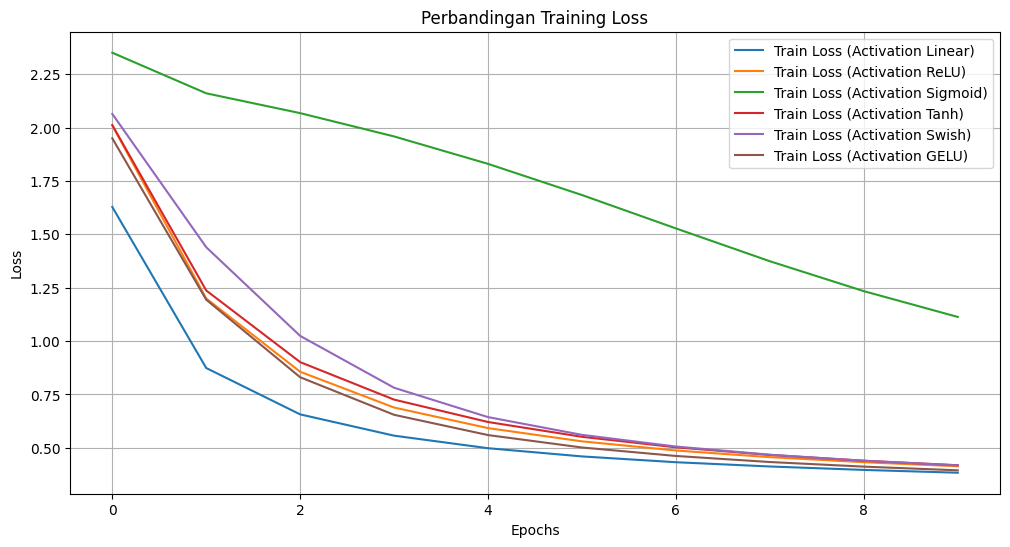

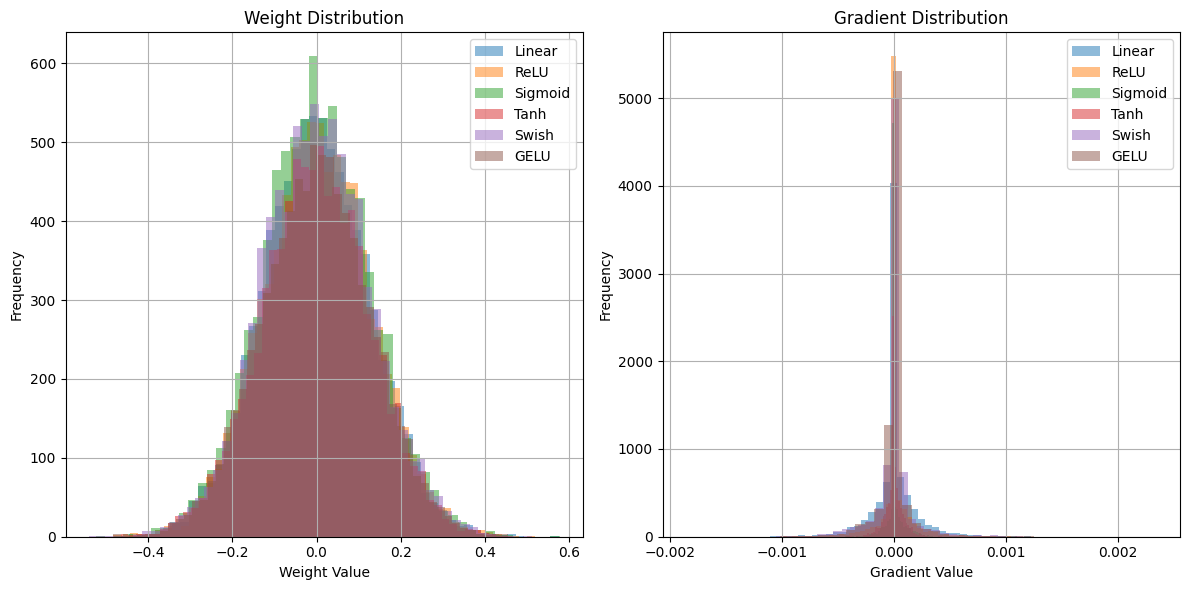

In [ ]:
print("Training model activation linear")
model_activation_linear = NeuralNetwork(
    layer_sizes=[784, 128, 64, 10],
    activation_names=[None, "linear", "relu", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)
history_activation_linear = model_activation_linear.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=10,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)
pred_activation_linear = model_activation_linear.forward(X_test)
pred_classes_activation_linear = np.argmax(pred_activation_linear, axis=1)
accuracy_activation_linear = np.mean(pred_classes_activation_linear == y_test)
print(f"Test Accuracy (Activation Linear): {accuracy_activation_linear:.4f}\n")

print("Training model activation relu")
model_activation_relu = NeuralNetwork(
    layer_sizes=[784, 128, 64, 10],
    activation_names=[None, "relu", "relu", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)
history_activation_relu = model_activation_relu.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=10,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)
pred_activation_relu = model_activation_relu.forward(X_test)
pred_classes_activation_relu = np.argmax(pred_activation_relu, axis=1)
accuracy_activation_relu = np.mean(pred_classes_activation_relu == y_test)
print(f"Test Accuracy (Activation ReLU): {accuracy_activation_relu:.4f}\n")

print("Training model activation sigmoid")
model_activation_sigmoid = NeuralNetwork(
    layer_sizes=[784, 128, 64, 10],
    activation_names=[None, "sigmoid", "relu", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)
history_activation_sigmoid = model_activation_sigmoid.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=10,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)
pred_activation_sigmoid = model_activation_sigmoid.forward(X_test)
pred_classes_activation_sigmoid = np.argmax(pred_activation_sigmoid, axis=1)
accuracy_activation_sigmoid = np.mean(pred_classes_activation_sigmoid == y_test)
print(f"Test Accuracy (Activation Sigmoid): {accuracy_activation_sigmoid:.4f}\n")

print("Training model activation tanh")
model_activation_tanh = NeuralNetwork(
    layer_sizes=[784, 128, 64, 10],
    activation_names=[None, "tanh", "relu", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)
history_activation_tanh = model_activation_tanh.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=10,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)
pred_activation_tanh = model_activation_tanh.forward(X_test)
pred_classes_activation_tanh = np.argmax(pred_activation_tanh, axis=1)
accuracy_activation_tanh = np.mean(pred_classes_activation_tanh == y_test)
print(f"Test Accuracy (Activation Tanh): {accuracy_activation_tanh:.4f}\n")

print("Training model activation swish")
model_activation_swish = NeuralNetwork(
    layer_sizes=[784, 128, 64, 10],
    activation_names=[None, "swish", "relu", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)
history_activation_swish = model_activation_swish.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=10,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)
pred_activation_swish = model_activation_swish.forward(X_test)
pred_classes_activation_swish = np.argmax(pred_activation_swish, axis=1)
accuracy_activation_swish = np.mean(pred_classes_activation_swish == y_test)
print(f"Test Accuracy (Activation Swish): {accuracy_activation_swish:.4f}\n")

print("Training model activation gelu")
model_activation_gelu = NeuralNetwork(
    layer_sizes=[784, 128, 64, 10],
    activation_names=[None, "gelu", "relu", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)
history_activation_gelu = model_activation_gelu.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=10,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)
pred_activation_gelu = model_activation_gelu.forward(X_test)
pred_classes_activation_gelu = np.argmax(pred_activation_gelu, axis=1)
accuracy_activation_gelu = np.mean(pred_classes_activation_gelu == y_test)
print(f"Test Accuracy (Activation GELU): {accuracy_activation_gelu:.4f}\n")

# grafik perbandingan loss
plt.figure(figsize=(12, 6))
plt.plot(
    history_activation_linear["train_loss"], label="Train Loss (Activation Linear)"
)
plt.plot(
    history_activation_relu["train_loss"], label="Train Loss (Activation ReLU)"
)
plt.plot(
    history_activation_sigmoid["train_loss"],
    label="Train Loss (Activation Sigmoid)",
)
plt.plot(
    history_activation_tanh["train_loss"], label="Train Loss (Activation Tanh)"
)
plt.plot(
    history_activation_swish["train_loss"], label="Train Loss (Activation Swish)"
)
plt.plot(
    history_activation_gelu["train_loss"], label="Train Loss (Activation GELU)"
)
plt.title("Perbandingan Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# grafik distribusi bobot dan gradien bobot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Weight Distribution")

plt.hist(
    model_activation_linear.layers[1].parameters['weights'].flatten(), 
    bins=50, alpha=0.5, label="Linear"
)
plt.hist(
    model_activation_relu.layers[1].parameters['weights'].flatten(), 
    bins=50, alpha=0.5, label="ReLU"
)
plt.hist(
    model_activation_sigmoid.layers[1].parameters['weights'].flatten(), 
    bins=50, alpha=0.5, label="Sigmoid"
)
plt.hist(
    model_activation_tanh.layers[1].parameters['weights'].flatten(), 
    bins=50, alpha=0.5, label="Tanh"
)
plt.hist(
    model_activation_swish.layers[1].parameters['weights'].flatten(), 
    bins=50, alpha=0.5, label="Swish"
)
plt.hist(
    model_activation_gelu.layers[1].parameters['weights'].flatten(), 
    bins=50, alpha=0.5, label="GELU"
)
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.title("Gradient Distribution")

plt.hist(
    model_activation_linear.layers[1].gradients['weights'].flatten(),
    bins=50, alpha=0.5, label="Linear",
)
plt.hist(
    model_activation_relu.layers[1].gradients['weights'].flatten(),
    bins=50, alpha=0.5, label="ReLU",
)
plt.hist(
    model_activation_sigmoid.layers[1].gradients['weights'].flatten(),
    bins=50, alpha=0.5, label="Sigmoid",
)
plt.hist(
    model_activation_tanh.layers[1].gradients['weights'].flatten(),
    bins=50, alpha=0.5, label="Tanh",
)
plt.hist(
    model_activation_swish.layers[1].gradients['weights'].flatten(),
    bins=50, alpha=0.5, label="Swish",
)
plt.hist(
    model_activation_gelu.layers[1].gradients['weights'].flatten(),
    bins=50, alpha=0.5, label="GELU",
)
plt.xlabel("Gradient Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



### Pengaruh Learning Rate

Training model with learning rate: 0.001


Epoch 1/10: 100%|██████████| 700/700 [00:02<00:00, 310.01it/s]


Epoch 1/10, Train Loss: 2.5113, Val Loss: 2.1698, Val Acc: 0.2030


Epoch 2/10: 100%|██████████| 700/700 [00:01<00:00, 388.63it/s]


Epoch 2/10, Train Loss: 2.0823, Val Loss: 1.9975, Val Acc: 0.3592


Epoch 3/10: 100%|██████████| 700/700 [00:01<00:00, 496.57it/s]


Epoch 3/10, Train Loss: 1.9210, Val Loss: 1.8449, Val Acc: 0.4737


Epoch 4/10: 100%|██████████| 700/700 [00:01<00:00, 516.97it/s]


Epoch 4/10, Train Loss: 1.7764, Val Loss: 1.7080, Val Acc: 0.5410


Epoch 5/10: 100%|██████████| 700/700 [00:01<00:00, 508.07it/s]


Epoch 5/10, Train Loss: 1.6464, Val Loss: 1.5852, Val Acc: 0.5938


Epoch 6/10: 100%|██████████| 700/700 [00:01<00:00, 513.92it/s]


Epoch 6/10, Train Loss: 1.5304, Val Loss: 1.4757, Val Acc: 0.6354


Epoch 7/10: 100%|██████████| 700/700 [00:01<00:00, 459.96it/s]


Epoch 7/10, Train Loss: 1.4272, Val Loss: 1.3795, Val Acc: 0.6620


Epoch 8/10: 100%|██████████| 700/700 [00:01<00:00, 505.97it/s]


Epoch 8/10, Train Loss: 1.3359, Val Loss: 1.2936, Val Acc: 0.6876


Epoch 9/10: 100%|██████████| 700/700 [00:01<00:00, 476.79it/s]


Epoch 9/10, Train Loss: 1.2548, Val Loss: 1.2180, Val Acc: 0.7062


Epoch 10/10: 100%|██████████| 700/700 [00:01<00:00, 481.67it/s]


Epoch 10/10, Train Loss: 1.1831, Val Loss: 1.1509, Val Acc: 0.7224
Test Accuracy (Learning Rate 0.001): 0.7326

Training model with learning rate: 0.01


Epoch 1/10: 100%|██████████| 700/700 [00:01<00:00, 527.50it/s]


Epoch 1/10, Train Loss: 1.8685, Val Loss: 1.3676, Val Acc: 0.6982


Epoch 2/10: 100%|██████████| 700/700 [00:01<00:00, 486.91it/s]


Epoch 2/10, Train Loss: 1.0933, Val Loss: 0.8968, Val Acc: 0.7909


Epoch 3/10: 100%|██████████| 700/700 [00:01<00:00, 491.05it/s]


Epoch 3/10, Train Loss: 0.7738, Val Loss: 0.6939, Val Acc: 0.8254


Epoch 4/10: 100%|██████████| 700/700 [00:01<00:00, 508.84it/s]


Epoch 4/10, Train Loss: 0.6264, Val Loss: 0.5895, Val Acc: 0.8440


Epoch 5/10: 100%|██████████| 700/700 [00:01<00:00, 462.82it/s]


Epoch 5/10, Train Loss: 0.5444, Val Loss: 0.5276, Val Acc: 0.8569


Epoch 6/10: 100%|██████████| 700/700 [00:01<00:00, 503.55it/s]


Epoch 6/10, Train Loss: 0.4925, Val Loss: 0.4848, Val Acc: 0.8663


Epoch 7/10: 100%|██████████| 700/700 [00:01<00:00, 509.42it/s]


Epoch 7/10, Train Loss: 0.4564, Val Loss: 0.4546, Val Acc: 0.8739


Epoch 8/10: 100%|██████████| 700/700 [00:01<00:00, 469.79it/s]


Epoch 8/10, Train Loss: 0.4298, Val Loss: 0.4323, Val Acc: 0.8757


Epoch 9/10: 100%|██████████| 700/700 [00:01<00:00, 520.32it/s]


Epoch 9/10, Train Loss: 0.4094, Val Loss: 0.4146, Val Acc: 0.8815


Epoch 10/10: 100%|██████████| 700/700 [00:01<00:00, 506.86it/s]


Epoch 10/10, Train Loss: 0.3933, Val Loss: 0.4001, Val Acc: 0.8835
Test Accuracy (Learning Rate 0.01): 0.8886

Training model with learning rate: 0.1


Epoch 1/10: 100%|██████████| 700/700 [00:01<00:00, 511.50it/s]


Epoch 1/10, Train Loss: 0.7410, Val Loss: 0.4144, Val Acc: 0.8795


Epoch 2/10: 100%|██████████| 700/700 [00:01<00:00, 499.09it/s]


Epoch 2/10, Train Loss: 0.3543, Val Loss: 0.3376, Val Acc: 0.9012


Epoch 3/10: 100%|██████████| 700/700 [00:01<00:00, 488.68it/s]


Epoch 3/10, Train Loss: 0.3091, Val Loss: 0.3103, Val Acc: 0.9074


Epoch 4/10: 100%|██████████| 700/700 [00:01<00:00, 503.48it/s]


Epoch 4/10, Train Loss: 0.2833, Val Loss: 0.2880, Val Acc: 0.9184


Epoch 5/10: 100%|██████████| 700/700 [00:01<00:00, 527.04it/s]


Epoch 5/10, Train Loss: 0.2634, Val Loss: 0.2715, Val Acc: 0.9204


Epoch 6/10: 100%|██████████| 700/700 [00:01<00:00, 487.19it/s]


Epoch 6/10, Train Loss: 0.2459, Val Loss: 0.2562, Val Acc: 0.9246


Epoch 7/10: 100%|██████████| 700/700 [00:01<00:00, 504.78it/s]


Epoch 7/10, Train Loss: 0.2301, Val Loss: 0.2464, Val Acc: 0.9275


Epoch 8/10: 100%|██████████| 700/700 [00:01<00:00, 500.00it/s]


Epoch 8/10, Train Loss: 0.2154, Val Loss: 0.2257, Val Acc: 0.9327


Epoch 9/10: 100%|██████████| 700/700 [00:01<00:00, 500.89it/s]


Epoch 9/10, Train Loss: 0.2020, Val Loss: 0.2189, Val Acc: 0.9365


Epoch 10/10: 100%|██████████| 700/700 [00:01<00:00, 507.30it/s]


Epoch 10/10, Train Loss: 0.1900, Val Loss: 0.2060, Val Acc: 0.9395
Test Accuracy (Learning Rate 0.1): 0.9416



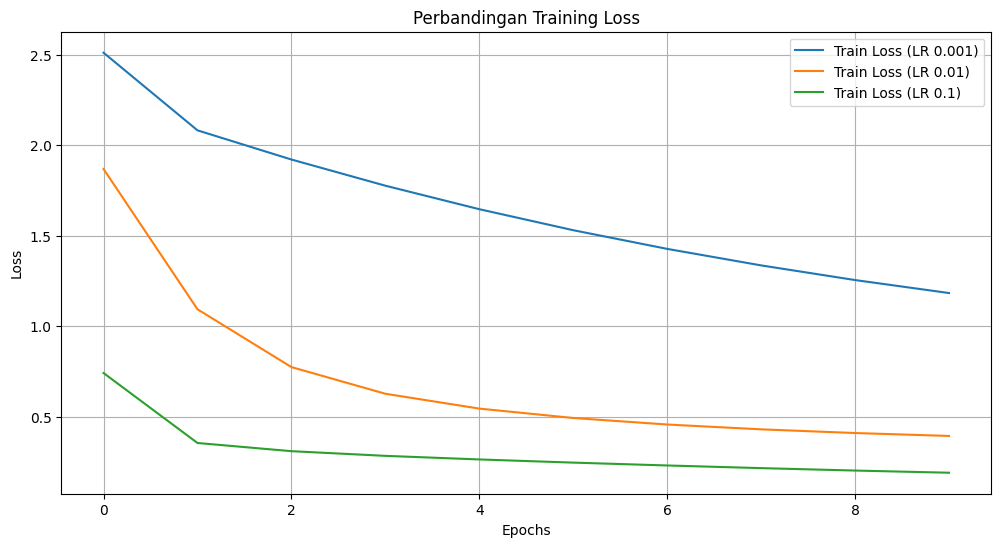

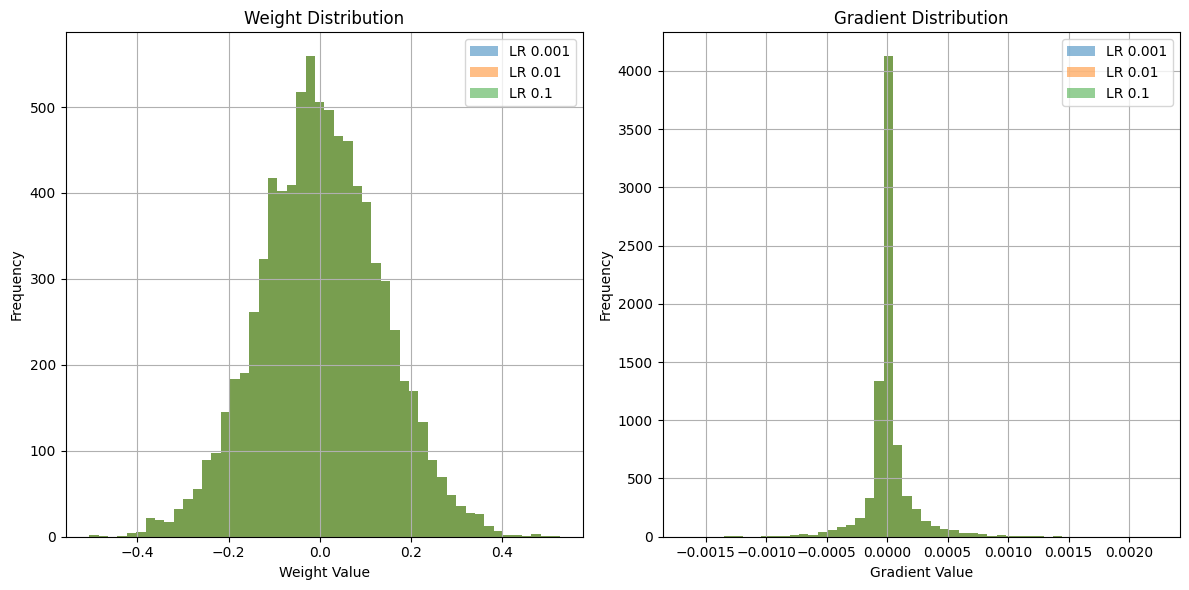

In [ ]:
# Variasi learning rate
learning_rates = [0.001, 0.01, 0.1]
results = {}
histories = {}

for lr in learning_rates:
    print(f"Training model with learning rate: {lr}")
    model_lr = NeuralNetwork(
        layer_sizes=[784, 128, 64, 10],
        activation_names=[None, "swish", "gelu", "softmax"],
        loss_function=CategoricalCrossEntropy(),
        weight_initializer=HeInitializer(),
    )
    history_lr = model_lr.train(
        X_train=X_train,
        y_train=y_train_cat,
        X_val=X_val,
        y_val=y_val_cat,
        batch_size=64,
        learning_rate=lr,
        epochs=10,
        momentum=0.9,
        verbose=1,
        early_stopping_patience=3,
    )
    histories[lr] = history_lr
    pred_lr = model_lr.forward(X_test)
    pred_classes_lr = np.argmax(pred_lr, axis=1)
    accuracy_lr = np.mean(pred_classes_lr == y_test)
    results[lr] = accuracy_lr
    print(f"Test Accuracy (Learning Rate {lr}): {accuracy_lr:.4f}\n")

# grafik perbandingan loss
plt.figure(figsize=(12, 6))
plt.plot(
    histories[0.001]["train_loss"], label="Train Loss (LR 0.001)"
)
plt.plot(
    histories[0.01]["train_loss"], label="Train Loss (LR 0.01)"
)
plt.plot(
    histories[0.1]["train_loss"], label="Train Loss (LR 0.1)"
)
plt.title("Perbandingan Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# grafik distribusi bobot dan gradien bobot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Weight Distribution")
plt.hist(
    model_lr.layers[1].parameters['weights'].flatten(), 
    bins=50, alpha=0.5, label="LR 0.001"
)
plt.hist(
    model_lr.layers[1].parameters['weights'].flatten(), 
    bins=50, alpha=0.5, label="LR 0.01"
)
plt.hist(
    model_lr.layers[1].parameters['weights'].flatten(), 
    bins=50, alpha=0.5, label="LR 0.1"
)
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.title("Gradient Distribution")
plt.hist(
    model_lr.layers[1].gradients['weights'].flatten(),
    bins=50, alpha=0.5, label="LR 0.001",
)
plt.hist(
    model_lr.layers[1].gradients['weights'].flatten(),
    bins=50, alpha=0.5, label="LR 0.01",
)
plt.hist(
    model_lr.layers[1].gradients['weights'].flatten(),
    bins=50, alpha=0.5, label="LR 0.1",
)
plt.xlabel("Gradient Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

### Pengaruh Inisialisasi Bobot

Training model with Zero initializer


Epoch 1/10: 100%|██████████| 700/700 [00:02<00:00, 345.36it/s]


Epoch 1/10, Train Loss: 2.3025, Val Loss: 2.3023, Val Acc: 0.1138


Epoch 2/10: 100%|██████████| 700/700 [00:01<00:00, 367.12it/s]


Epoch 2/10, Train Loss: 2.3022, Val Loss: 2.3021, Val Acc: 0.1138


Epoch 3/10: 100%|██████████| 700/700 [00:01<00:00, 524.81it/s]


Epoch 3/10, Train Loss: 2.3020, Val Loss: 2.3020, Val Acc: 0.1138


Epoch 4/10: 100%|██████████| 700/700 [00:01<00:00, 459.53it/s]


Epoch 4/10, Train Loss: 2.3019, Val Loss: 2.3018, Val Acc: 0.1138


Epoch 5/10: 100%|██████████| 700/700 [00:01<00:00, 500.71it/s]


Epoch 5/10, Train Loss: 2.3017, Val Loss: 2.3017, Val Acc: 0.1138


Epoch 6/10: 100%|██████████| 700/700 [00:01<00:00, 444.32it/s]


Epoch 6/10, Train Loss: 2.3016, Val Loss: 2.3016, Val Acc: 0.1138


Epoch 7/10: 100%|██████████| 700/700 [00:01<00:00, 491.21it/s]


Epoch 7/10, Train Loss: 2.3015, Val Loss: 2.3016, Val Acc: 0.1138


Epoch 8/10: 100%|██████████| 700/700 [00:01<00:00, 497.31it/s]


Epoch 8/10, Train Loss: 2.3015, Val Loss: 2.3015, Val Acc: 0.1138


Epoch 9/10: 100%|██████████| 700/700 [00:01<00:00, 494.63it/s]


Epoch 9/10, Train Loss: 2.3014, Val Loss: 2.3015, Val Acc: 0.1138


Epoch 10/10: 100%|██████████| 700/700 [00:01<00:00, 507.25it/s]


Epoch 10/10, Train Loss: 2.3014, Val Loss: 2.3015, Val Acc: 0.1138
Test Accuracy (Zero Initializer): 0.1143

Training model with Uniform initializer


Epoch 1/10: 100%|██████████| 700/700 [00:01<00:00, 462.82it/s]


Epoch 1/10, Train Loss: 2.2980, Val Loss: 2.2824, Val Acc: 0.2337


Epoch 2/10: 100%|██████████| 700/700 [00:01<00:00, 399.73it/s]


Epoch 2/10, Train Loss: 2.2659, Val Loss: 2.2467, Val Acc: 0.3475


Epoch 3/10: 100%|██████████| 700/700 [00:01<00:00, 481.66it/s]


Epoch 3/10, Train Loss: 2.2226, Val Loss: 2.1921, Val Acc: 0.4285


Epoch 4/10: 100%|██████████| 700/700 [00:01<00:00, 436.65it/s]


Epoch 4/10, Train Loss: 2.1477, Val Loss: 2.0900, Val Acc: 0.4573


Epoch 5/10: 100%|██████████| 700/700 [00:01<00:00, 467.70it/s]


Epoch 5/10, Train Loss: 2.0104, Val Loss: 1.9135, Val Acc: 0.5179


Epoch 6/10: 100%|██████████| 700/700 [00:01<00:00, 463.47it/s]


Epoch 6/10, Train Loss: 1.7878, Val Loss: 1.6448, Val Acc: 0.6200


Epoch 7/10: 100%|██████████| 700/700 [00:01<00:00, 454.02it/s]


Epoch 7/10, Train Loss: 1.4796, Val Loss: 1.3154, Val Acc: 0.7289


Epoch 8/10: 100%|██████████| 700/700 [00:01<00:00, 520.40it/s]


Epoch 8/10, Train Loss: 1.1619, Val Loss: 1.0333, Val Acc: 0.7697


Epoch 9/10: 100%|██████████| 700/700 [00:01<00:00, 485.31it/s]


Epoch 9/10, Train Loss: 0.9246, Val Loss: 0.8477, Val Acc: 0.7941


Epoch 10/10: 100%|██████████| 700/700 [00:01<00:00, 480.51it/s]


Epoch 10/10, Train Loss: 0.7728, Val Loss: 0.7296, Val Acc: 0.8131
Test Accuracy (Uniform Initializer): 0.8192

Training model with Normal initializer


Epoch 1/10: 100%|██████████| 700/700 [00:01<00:00, 454.01it/s]


Epoch 1/10, Train Loss: 2.1680, Val Loss: 1.9888, Val Acc: 0.4357


Epoch 2/10: 100%|██████████| 700/700 [00:01<00:00, 449.09it/s]


Epoch 2/10, Train Loss: 1.7684, Val Loss: 1.5255, Val Acc: 0.6455


Epoch 3/10: 100%|██████████| 700/700 [00:01<00:00, 452.22it/s]


Epoch 3/10, Train Loss: 1.2915, Val Loss: 1.0865, Val Acc: 0.7571


Epoch 4/10: 100%|██████████| 700/700 [00:01<00:00, 437.37it/s]


Epoch 4/10, Train Loss: 0.9395, Val Loss: 0.8294, Val Acc: 0.7996


Epoch 5/10: 100%|██████████| 700/700 [00:01<00:00, 479.82it/s]


Epoch 5/10, Train Loss: 0.7461, Val Loss: 0.6909, Val Acc: 0.8234


Epoch 6/10: 100%|██████████| 700/700 [00:01<00:00, 485.29it/s]


Epoch 6/10, Train Loss: 0.6374, Val Loss: 0.6088, Val Acc: 0.8395


Epoch 7/10: 100%|██████████| 700/700 [00:01<00:00, 482.39it/s]


Epoch 7/10, Train Loss: 0.5693, Val Loss: 0.5543, Val Acc: 0.8496


Epoch 8/10: 100%|██████████| 700/700 [00:01<00:00, 453.94it/s]


Epoch 8/10, Train Loss: 0.5226, Val Loss: 0.5162, Val Acc: 0.8548


Epoch 9/10: 100%|██████████| 700/700 [00:01<00:00, 434.98it/s]


Epoch 9/10, Train Loss: 0.4886, Val Loss: 0.4868, Val Acc: 0.8621


Epoch 10/10: 100%|██████████| 700/700 [00:01<00:00, 419.30it/s]


Epoch 10/10, Train Loss: 0.4626, Val Loss: 0.4642, Val Acc: 0.8668
Test Accuracy (Normal Initializer): 0.8730

Training model with Xavier initializer


Epoch 1/10: 100%|██████████| 700/700 [00:01<00:00, 488.25it/s]


Epoch 1/10, Train Loss: 2.1958, Val Loss: 1.9724, Val Acc: 0.4421


Epoch 2/10: 100%|██████████| 700/700 [00:01<00:00, 498.48it/s]


Epoch 2/10, Train Loss: 1.7513, Val Loss: 1.5160, Val Acc: 0.6552


Epoch 3/10: 100%|██████████| 700/700 [00:01<00:00, 483.96it/s]


Epoch 3/10, Train Loss: 1.2896, Val Loss: 1.0779, Val Acc: 0.7550


Epoch 4/10: 100%|██████████| 700/700 [00:01<00:00, 478.83it/s]


Epoch 4/10, Train Loss: 0.9236, Val Loss: 0.8038, Val Acc: 0.8046


Epoch 5/10: 100%|██████████| 700/700 [00:01<00:00, 518.76it/s]


Epoch 5/10, Train Loss: 0.7189, Val Loss: 0.6597, Val Acc: 0.8297


Epoch 6/10: 100%|██████████| 700/700 [00:01<00:00, 469.85it/s]


Epoch 6/10, Train Loss: 0.6068, Val Loss: 0.5756, Val Acc: 0.8477


Epoch 7/10: 100%|██████████| 700/700 [00:01<00:00, 488.32it/s]


Epoch 7/10, Train Loss: 0.5383, Val Loss: 0.5217, Val Acc: 0.8598


Epoch 8/10: 100%|██████████| 700/700 [00:01<00:00, 499.27it/s]


Epoch 8/10, Train Loss: 0.4923, Val Loss: 0.4841, Val Acc: 0.8679


Epoch 9/10: 100%|██████████| 700/700 [00:01<00:00, 434.00it/s]


Epoch 9/10, Train Loss: 0.4593, Val Loss: 0.4566, Val Acc: 0.8761


Epoch 10/10: 100%|██████████| 700/700 [00:01<00:00, 484.25it/s]


Epoch 10/10, Train Loss: 0.4348, Val Loss: 0.4350, Val Acc: 0.8802
Test Accuracy (Xavier Initializer): 0.8834

Training model with He initializer


Epoch 1/10: 100%|██████████| 700/700 [00:02<00:00, 280.31it/s]


Epoch 1/10, Train Loss: 1.9321, Val Loss: 1.4011, Val Acc: 0.6842


Epoch 2/10: 100%|██████████| 700/700 [00:02<00:00, 294.46it/s]


Epoch 2/10, Train Loss: 1.1036, Val Loss: 0.9043, Val Acc: 0.7913


Epoch 3/10: 100%|██████████| 700/700 [00:02<00:00, 292.81it/s]


Epoch 3/10, Train Loss: 0.7772, Val Loss: 0.7021, Val Acc: 0.8216


Epoch 4/10: 100%|██████████| 700/700 [00:02<00:00, 280.98it/s]


Epoch 4/10, Train Loss: 0.6322, Val Loss: 0.6002, Val Acc: 0.8408


Epoch 5/10: 100%|██████████| 700/700 [00:02<00:00, 298.69it/s]


Epoch 5/10, Train Loss: 0.5525, Val Loss: 0.5377, Val Acc: 0.8537


Epoch 6/10: 100%|██████████| 700/700 [00:02<00:00, 285.98it/s]


Epoch 6/10, Train Loss: 0.5019, Val Loss: 0.4957, Val Acc: 0.8619


Epoch 7/10: 100%|██████████| 700/700 [00:02<00:00, 296.79it/s]


Epoch 7/10, Train Loss: 0.4660, Val Loss: 0.4648, Val Acc: 0.8679


Epoch 8/10: 100%|██████████| 700/700 [00:02<00:00, 274.94it/s]


Epoch 8/10, Train Loss: 0.4397, Val Loss: 0.4421, Val Acc: 0.8730


Epoch 9/10: 100%|██████████| 700/700 [00:02<00:00, 271.04it/s]


Epoch 9/10, Train Loss: 0.4192, Val Loss: 0.4239, Val Acc: 0.8774


Epoch 10/10: 100%|██████████| 700/700 [00:02<00:00, 276.16it/s]


Epoch 10/10, Train Loss: 0.4027, Val Loss: 0.4093, Val Acc: 0.8827
Test Accuracy (He Initializer): 0.8856



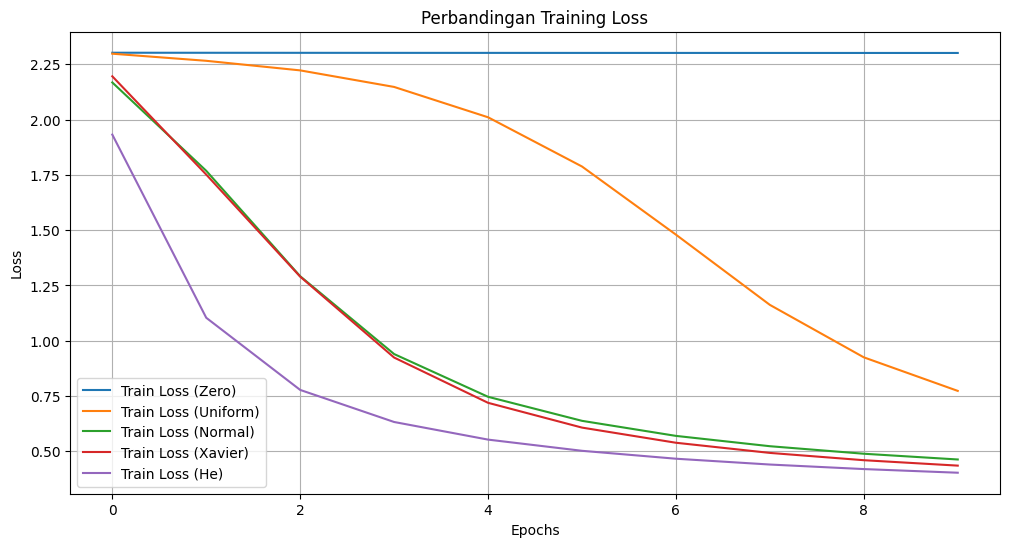

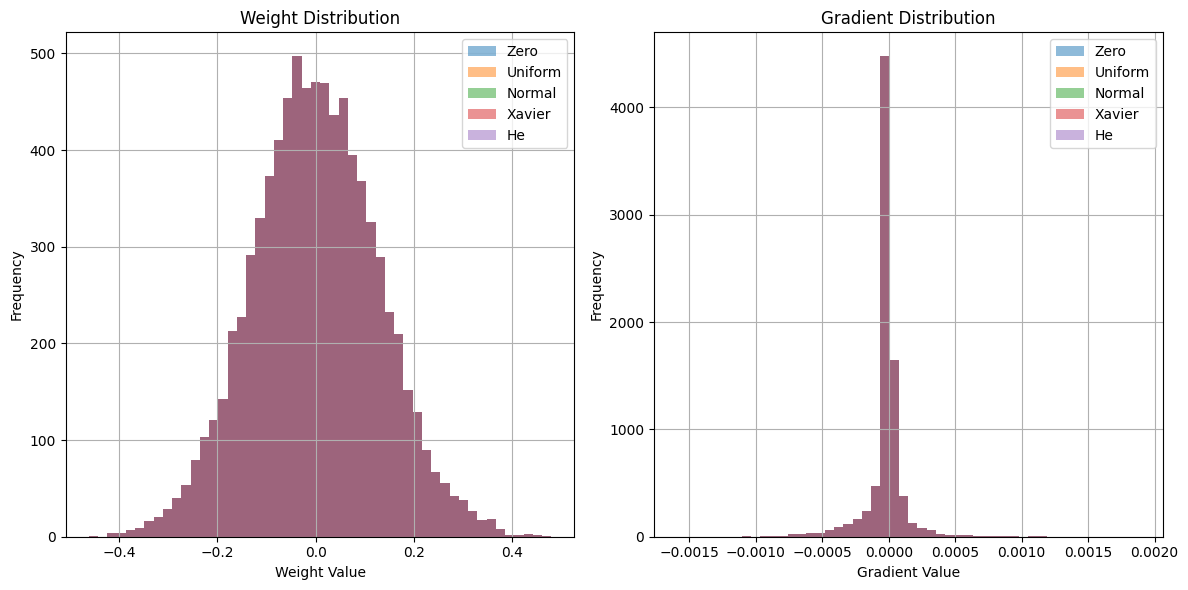

In [ ]:
# Variasi weight initializer
weight_initializers = {
    "Zero": ZeroInitializer(),
    "Uniform": UniformInitializer(),
    "Normal": NormalInitializer(),
    "Xavier": XavierInitializer(),
    "He": HeInitializer(),
}

results_initializers = {}
histories_initializers = {}

for name, initializer in weight_initializers.items():
    print(f"Training model with {name} initializer")
    model_initializer = NeuralNetwork(
        layer_sizes=[784, 128, 64, 10],
        activation_names=[None, "swish", "gelu", "softmax"],
        loss_function=CategoricalCrossEntropy(),
        weight_initializer=initializer,
    )
    history_initializer = model_initializer.train(
        X_train=X_train,
        y_train=y_train_cat,
        X_val=X_val,
        y_val=y_val_cat,
        batch_size=64,
        learning_rate=0.01,
        epochs=10,
        momentum=0.9,
        verbose=1,
        early_stopping_patience=3,
    )
    histories_initializers[name] = history_initializer
    pred_initializer = model_initializer.forward(X_test)
    pred_classes_initializer = np.argmax(pred_initializer, axis=1)
    accuracy_initializer = np.mean(pred_classes_initializer == y_test)
    results_initializers[name] = accuracy_initializer
    print(f"Test Accuracy ({name} Initializer): {accuracy_initializer:.4f}\n")

# grafik perbandingan loss
plt.figure(figsize=(12, 6))
plt.plot(
    histories_initializers["Zero"]["train_loss"], label="Train Loss (Zero)"
)
plt.plot(
    histories_initializers["Uniform"]["train_loss"], label="Train Loss (Uniform)"
)
plt.plot(
    histories_initializers["Normal"]["train_loss"], label="Train Loss (Normal)"
)
plt.plot(
    histories_initializers["Xavier"]["train_loss"], label="Train Loss (Xavier)"
)
plt.plot(
    histories_initializers["He"]["train_loss"], label="Train Loss (He)"
)

plt.title("Perbandingan Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# grafik distribusi bobot dan gradien bobot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Weight Distribution")
plt.hist(
    model_initializer.layers[1].parameters['weights'].flatten(), 
    bins=50, alpha=0.5, label="Zero"
)
plt.hist(
    model_initializer.layers[1].parameters['weights'].flatten(), 
    bins=50, alpha=0.5, label="Uniform"
)
plt.hist(
    model_initializer.layers[1].parameters['weights'].flatten(), 
    bins=50, alpha=0.5, label="Normal"
)
plt.hist(
    model_initializer.layers[1].parameters['weights'].flatten(), 
    bins=50, alpha=0.5, label="Xavier"
)
plt.hist(
    model_initializer.layers[1].parameters['weights'].flatten(), 
    bins=50, alpha=0.5, label="He"
)
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.title("Gradient Distribution")
plt.hist(
    model_initializer.layers[1].gradients['weights'].flatten(),
    bins=50, alpha=0.5, label="Zero",
)
plt.hist(
    model_initializer.layers[1].gradients['weights'].flatten(),
    bins=50, alpha=0.5, label="Uniform",
)
plt.hist(
    model_initializer.layers[1].gradients['weights'].flatten(),
    bins=50, alpha=0.5, label="Normal",
)
plt.hist(
    model_initializer.layers[1].gradients['weights'].flatten(),
    bins=50, alpha=0.5, label="Xavier",
)
plt.hist(
    model_initializer.layers[1].gradients['weights'].flatten(),
    bins=50, alpha=0.5, label="He",
)
plt.xlabel("Gradient Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Perbandingan dengan MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

ffnn_model = NeuralNetwork(
    layer_sizes=[784, 128, 64, 10],
    activation_names=[None, "relu", "relu", "softmax"],
    loss_function=CategoricalCrossEntropy(),
    weight_initializer=HeInitializer(),
)
history_ffnn = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_cat,
    X_val=X_val,
    y_val=y_val_cat,
    batch_size=64,
    learning_rate=0.01,
    epochs=10,
    momentum=0.9,
    verbose=1,
    early_stopping_patience=3,
)
pred_ffnn = ffnn_model.forward(X_test)
pred_classes_ffnn = np.argmax(pred_ffnn, axis=1)
accuracy_ffnn = np.mean(pred_classes_ffnn == y_test)
print(f"Test Accuracy (FFNN): {accuracy_ffnn:.4f}\n")

mlp_model = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation="relu",
    solver="sgd",
    learning_rate_init=0.01,
    batch_size=64,
    max_iter=10,
    momentum=0.9,
    random_state=42,
)
mlp_model.fit(X_train, y_train_cat.argmax(axis=1))
pred_mlp = mlp_model.predict(X_test)
accuracy_mlp = np.mean(pred_mlp == y_test)
print(f"Test Accuracy (MLPClassifier): {accuracy_mlp:.4f}\n")

Epoch 1/10: 100%|██████████| 700/700 [00:01<00:00, 455.88it/s]


Epoch 1/10, Train Loss: 1.9622, Val Loss: 1.5082, Val Acc: 0.6442


Epoch 2/10: 100%|██████████| 700/700 [00:01<00:00, 462.85it/s]


Epoch 2/10, Train Loss: 1.2334, Val Loss: 1.0140, Val Acc: 0.7736


Epoch 3/10: 100%|██████████| 700/700 [00:01<00:00, 541.75it/s]


Epoch 3/10, Train Loss: 0.8672, Val Loss: 0.7647, Val Acc: 0.8146


Epoch 4/10: 100%|██████████| 700/700 [00:01<00:00, 581.64it/s]


Epoch 4/10, Train Loss: 0.6848, Val Loss: 0.6351, Val Acc: 0.8413


Epoch 5/10: 100%|██████████| 700/700 [00:01<00:00, 664.69it/s]


Epoch 5/10, Train Loss: 0.5842, Val Loss: 0.5586, Val Acc: 0.8557


Epoch 6/10: 100%|██████████| 700/700 [00:01<00:00, 649.77it/s]


Epoch 6/10, Train Loss: 0.5212, Val Loss: 0.5079, Val Acc: 0.8659


Epoch 7/10: 100%|██████████| 700/700 [00:01<00:00, 668.50it/s]


Epoch 7/10, Train Loss: 0.4779, Val Loss: 0.4716, Val Acc: 0.8710


Epoch 8/10: 100%|██████████| 700/700 [00:01<00:00, 650.55it/s]


Epoch 8/10, Train Loss: 0.4464, Val Loss: 0.4455, Val Acc: 0.8774


Epoch 9/10: 100%|██████████| 700/700 [00:01<00:00, 598.28it/s]


Epoch 9/10, Train Loss: 0.4224, Val Loss: 0.4235, Val Acc: 0.8810


Epoch 10/10: 100%|██████████| 700/700 [00:01<00:00, 641.94it/s]


Epoch 10/10, Train Loss: 0.4032, Val Loss: 0.4072, Val Acc: 0.8847
Test Accuracy (FFNN): 0.8897

Test Accuracy (MLPClassifier): 0.9739



d:\Informatika\ML\Tubes1_IF3270_ML_FFNN\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
